# 1. Problem statement 

- Implement a decision tree classifier model to predict whether a client will subscribe to term deposit or not.
- Complete the data preprocessing of the data based on different type of variables.
- Test and Evaluate the model

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.tree as st
import sklearn.model_selection as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
#Reading the data in the data frame from excel file

df = pd.read_excel("Bank Data for case study assignment.xlsx", header=0)
df.shape


(1021, 8)

In [3]:
df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [4]:
#column name change to remove the special characters
df.columns = ['age', 'job', 'marital_status ', 'education', 'credit_default', 'housing_loan', 'personal_loan', 'y']
df.columns

Index(['age', 'job', 'marital_status ', 'education', 'credit_default',
       'housing_loan', 'personal_loan', 'y'],
      dtype='object')

In [5]:
main_df = df
main_df.shape

(1021, 8)

# 2. Exploratory data Analysis

In [6]:
#initial analysis of the data - summary of the data
description = main_df.describe(include = 'all')
description

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,y
count,1021.000000,1019,1020,1020,1020,1019,1019,1021
unique,NaN,12,3,4,2,3,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,617,524,998,583,869,897
mean,41.066601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.400013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 Age Summary (Numerical Attribute)

In [7]:
#age summary
main_df['age'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

count    1021.000000
mean       41.066601
std        10.400013
min        19.000000
10%        29.000000
20%        32.000000
30%        34.000000
40%        37.000000
50%        39.000000
60%        42.000000
70%        46.000000
80%        50.000000
90%        56.000000
100%       84.000000
max        84.000000
Name: age, dtype: float64

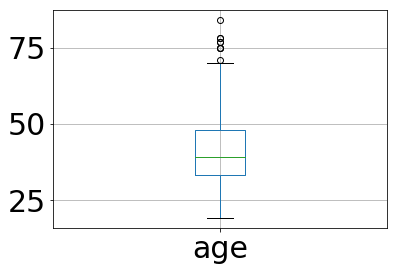

In [8]:
#age boxplot
main_df.boxplot(column='age', fontsize=30)

In [9]:
def age_simplify(x):
    a=''
    if x['age'] < 34:
        a = 'young'
    elif x['age'] >= 34 and x['age'] < 43:
        a = 'middle-aged'
    elif x['age'] >= 43:
        a = 'old'
    return a

main_df['age_new'] = main_df.apply(age_simplify, axis = 1)
# main_df['age_new'].describe(include='all')
main_df['age_new'].unique()
# main_df['age'].isna().sum(), main_df['age_new'].isna().sum()

array(['young', 'middle-aged', 'old'], dtype=object)

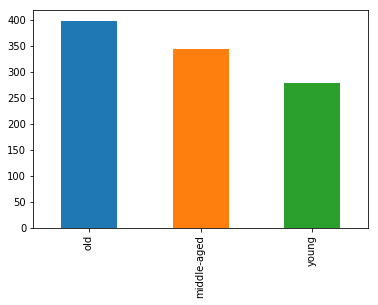

In [10]:
main_df['age_new'].value_counts().plot(kind='bar')
# len(main_df['age_new'])

In [11]:
main_df.columns

Index(['age', 'job', 'marital_status ', 'education', 'credit_default',
       'housing_loan', 'personal_loan', 'y', 'age_new'],
      dtype='object')

### 2.2 Marital Status Summary (Nominal Attribute)

In [12]:
# desc = df["marital status "].describe()
# print(desc)
main_df["marital_status "].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

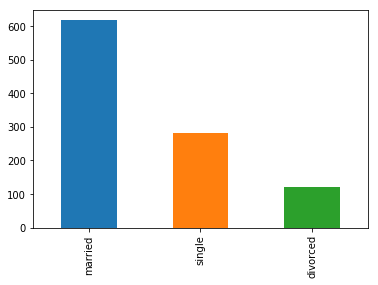

In [13]:
#df.plot(y='marital status ', kind='hist')
# fig, ax = plt.subplots()
df['marital_status '].value_counts().plot(kind='bar')

### 2.3 Job Summary (Ordinal Attribute)

In [14]:
desc = main_df["job"].describe()
print(desc)
main_df["job"].unique()

count            1019
unique             12
top       blue-collar
freq              217
Name: job, dtype: object


array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', nan, 'unknown'], dtype=object)

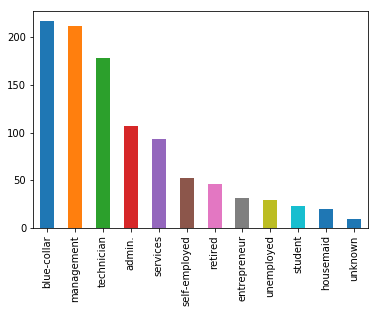

In [15]:
# fig, ax = plt.subplots()
main_df['job'].value_counts().plot(kind='bar')

In [16]:
# df = df[df['job'] != 'unknown']
main_df['job'].value_counts()

blue-collar      217
management       212
technician       178
admin.           107
services          93
self-employed     52
retired           46
entrepreneur      32
unemployed        29
student           23
housemaid         20
unknown           10
Name: job, dtype: int64

### 2.4 Educaton Summary (Ordinal Attribute) 

In [17]:
# desc = main_df["education"].describe()
# print(desc)
main_df["education"].describe()

count          1020
unique            4
top       secondary
freq            524
Name: education, dtype: object

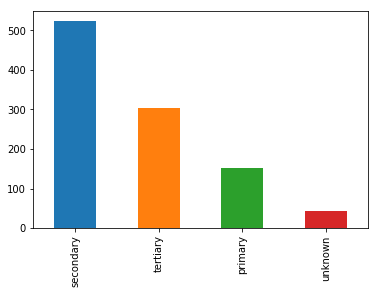

In [18]:
# fig, ax = plt.subplots()
main_df['education'].value_counts().plot(kind='bar')

In [19]:
# df = df[df['education'] != 'unknown']
main_df['education'].value_counts()

secondary    524
tertiary     303
primary      151
unknown       42
Name: education, dtype: int64


### 2.5 Credit Default Summary (Binary Attribute)

In [20]:
main_df["credit_default"].describe()

count     1020
unique       2
top         no
freq       998
Name: credit_default, dtype: object

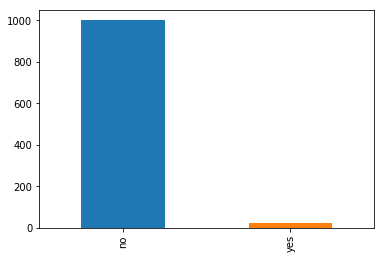

In [21]:
# fig, ax = plt.subplots()
main_df['credit_default'].value_counts().plot(kind='bar')

In [22]:
main_df['credit_default'].value_counts()

no     998
yes     22
Name: credit_default, dtype: int64

### 2.6 Housing Loan Summary (Binary Variable)

In [23]:
main_df["housing_loan"].describe()

count     1019
unique       3
top        yes
freq       583
Name: housing_loan, dtype: object

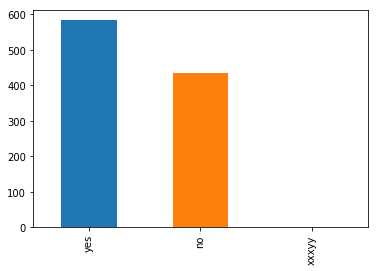

In [24]:
main_df['housing_loan'].value_counts().plot(kind='bar')

In [25]:
main_df["housing_loan"].value_counts()

yes      583
no       435
xxxyy      1
Name: housing_loan, dtype: int64

### 2.7 Personal Loan Summary (Binary Variable)

In [26]:
# desc = df["Personal loan"].describe()
# print(desc)
main_df["personal_loan"].describe()

count     1019
unique       2
top         no
freq       869
Name: personal_loan, dtype: object

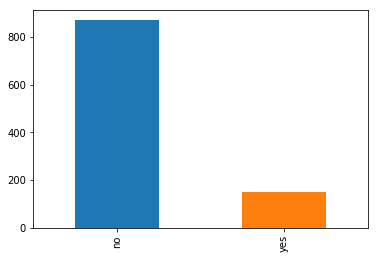

In [27]:
# fig, ax = plt.subplots()
df['personal_loan'].value_counts().plot(kind='bar')

In [28]:
main_df['personal_loan'].value_counts()

no     869
yes    150
Name: personal_loan, dtype: int64

### 2.8 Result variable Summary (Binary Variable)

In [29]:
desc = main_df["y"].describe()
print(desc)
main_df["y"].unique()

count     1021
unique       2
top         no
freq       897
Name: y, dtype: object


array(['no', 'yes'], dtype=object)

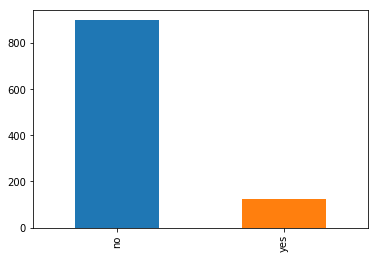

In [30]:
# fig, ax = plt.subplots()
main_df['y'].value_counts().plot(kind='bar')

In [31]:
main_df['y'].value_counts()

no     897
yes    124
Name: y, dtype: int64

# 3. Data Preprocessing

### 3.1 Noisy Data

#### 3.1.1 Missing Values

In [32]:
#check for missing values
main_df.isna().sum()

age                0
job                2
marital_status     1
education          1
credit_default     1
housing_loan       2
personal_loan      2
y                  0
age_new            0
dtype: int64

In [33]:
#Calculate the %age of missing value row
main_df.isna().sum().sum()*100/main_df.shape[0]
# main_df.shape


0.881488736532811

Since the percentage of rows containing missing values is really small so removing those from the data set.  

In [34]:
#remove the missing value rows
main_df.dropna(inplace=True)
main_df.shape

(1013, 9)

#### 3.1.2 Corrup/Irrelavant Values

In [35]:
#wrong values in housing loan
main_df[main_df['housing_loan']=='xxxyy']

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,y,age_new
800,59,management,married,tertiary,no,xxxyy,no,no,old


Since there is only one row so removing from the data set.

In [36]:
# removing the row containing wrong housing loan information
main_df = main_df[main_df['housing_loan']!='xxxyy']
main_df.shape

(1012, 9)

In [37]:
# number and %age of rows containing the 'unknown' value for the education
main_df[main_df['education']=='unknown'].shape[0], ',', main_df[main_df['education']=='unknown'].shape[0]*100/main_df.shape[0]

(42, ',', 4.150197628458498)

Since the rows containing 'unknown' value for education are 4% approx, so we can remove those rows.

In [38]:
#removing the rows containing 'unknown' value for education
main_df = main_df[main_df['education']!='unknown']
main_df.shape

(970, 9)

In [39]:
# number and %age of rows containing the 'unknown' value for the job
main_df[main_df['job']=='unknown'].shape[0], ',', main_df[main_df['job']=='unknown'].shape[0]*100/main_df.shape[0]

(7, ',', 0.7216494845360825)

Since the rows containing 'unknown' value for job are 0.72% approx, so we can remove those rows.

In [40]:
#removing the rows containing 'unknown' value for education
main_df = main_df[main_df['job']!='unknown']
main_df.shape

(963, 9)

# 4. Training Data and Test Data Selection

In [41]:
# Encoding the main df with encoder before the data split and model creation
le=LabelEncoder()
balanced_data = main_df.apply(le.fit_transform)
balanced_data.shape

(963, 9)

In [42]:
# split the feature data and target variable
feature_cols = ['job', 'marital_status ', 'education', 'credit_default', 'housing_loan', 'personal_loan', 'age_new']
feature_df = balanced_data[feature_cols]
target_var = balanced_data['y']
feature_df.shape, target_var.shape

((963, 7), (963,))

In [43]:
X_train, X_test, y_train, y_test = sm.train_test_split(feature_df, target_var, test_size = 0.3, random_state = 9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((674, 7), (289, 7), (674,), (289,))

# 5. Training the Model / 6. Model Testing / 7. Evaluating Model performance 

### Decision Tree with Information Gain Criterion

In [44]:
clf = st.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
y_pred = clf.predict(X_test)
y_pred.shape[0]

289

In [46]:
"Accuracy: "+str(metrics.accuracy_score(y_test, y_pred))

'Accuracy: 0.8096885813148789'

In [47]:
# tn, fn, tp, fp = metrics.confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp
tn, fp = metrics.confusion_matrix(y_test, y_pred)[0]
fn, tp = metrics.confusion_matrix(y_test, y_pred)[1]
tn, fp, fn, tp

(230, 21, 34, 4)

In [48]:
#accuracy
"Accuracy: "+ str((tn+tp)/(tn+tp+fn+fp))

'Accuracy: 0.8096885813148789'

In [49]:
#error rate
"Error Rate: "+ str((fn+fp)/(tn+tp+fn+fp))

'Error Rate: 0.1903114186851211'

In [50]:
#Sensitivity
"Sensitivity: "+ str(tp/(tp+fn))

'Sensitivity: 0.10526315789473684'

In [51]:
#specificity
"Specificity: "+ str(tn/(tn+fp))

'Specificity: 0.9163346613545816'

In [52]:
#precision
"Precision: "+ str(tp/(tp+fp))

'Precision: 0.16'

[Text(0,0.5,'no'), Text(0,1.5,'yes')]

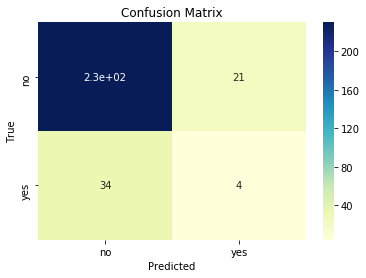

In [75]:
cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']) 
ax.yaxis.set_ticklabels(['no', 'yes'])

### Decision Tree with Gini Index Criterion

In [53]:
clf_gini = st.DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini.shape[0]

289

In [55]:
"Accuracy: "+str(metrics.accuracy_score(y_test, y_pred_gini))

'Accuracy: 0.8096885813148789'

In [56]:
# tn, fn, tp, fp = metrics.confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp
tn_gini, fp_gini = metrics.confusion_matrix(y_test, y_pred_gini)[0]
fn_gini, tp_gini = metrics.confusion_matrix(y_test, y_pred_gini)[1]
tn_gini, fp_gini, fn_gini, tp_gini

(231, 20, 35, 3)

In [57]:
#gini accuracy
"Accuracy: "+ str((tn_gini+tp_gini)/(tn_gini+tp_gini+fn_gini+fp_gini))

'Accuracy: 0.8096885813148789'

In [58]:
#gini error rate
"Error Rate: "+ str((fn_gini+fp_gini)/(tn_gini+tp_gini+fn_gini+fp_gini))

'Error Rate: 0.1903114186851211'

In [59]:
#gini Sensitivity
"Sensitivity: "+ str(tp_gini/(tp_gini+fn_gini))

'Sensitivity: 0.07894736842105263'

In [60]:
#gini specificity
"Specificity: "+ str(tn_gini/(tn_gini+fp_gini))

'Specificity: 0.9203187250996016'

In [61]:
#gini precision
"Precision: "+ str(tp_gini/(tp_gini+fp_gini))

'Precision: 0.13043478260869565'

In [62]:
metrics.classification_report(y_test, y_pred_gini, digits = 5, output_dict=True)

{'0': {'precision': 0.868421052631579,
  'recall': 0.9203187250996016,
  'f1-score': 0.8936170212765957,
  'support': 251},
 '1': {'precision': 0.13043478260869565,
  'recall': 0.07894736842105263,
  'f1-score': 0.09836065573770492,
  'support': 38},
 'micro avg': {'precision': 0.8096885813148789,
  'recall': 0.8096885813148789,
  'f1-score': 0.809688581314879,
  'support': 289},
 'macro avg': {'precision': 0.49942791762013733,
  'recall': 0.4996330467603271,
  'f1-score': 0.4959888385071503,
  'support': 289},
 'weighted avg': {'precision': 0.7713847956735528,
  'recall': 0.8096885813148789,
  'f1-score': 0.7890504403406862,
  'support': 289}}

In [65]:
metrics.f1_score(y_test, y_pred_gini), metrics.f1_score(y_test, y_pred)

(0.09836065573770492, 0.12698412698412698)

[[231  20]
 [ 35   3]]


[Text(0,0.5,'no'), Text(0,1.5,'yes')]

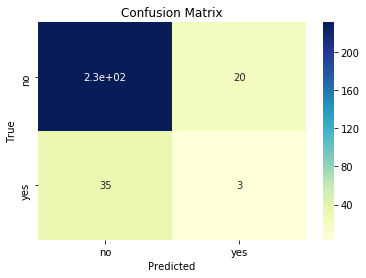

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred_gini)
print(cm)
ax= plt.subplot()
sn.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['no', 'yes']) 
ax.yaxis.set_ticklabels(['no', 'yes'])

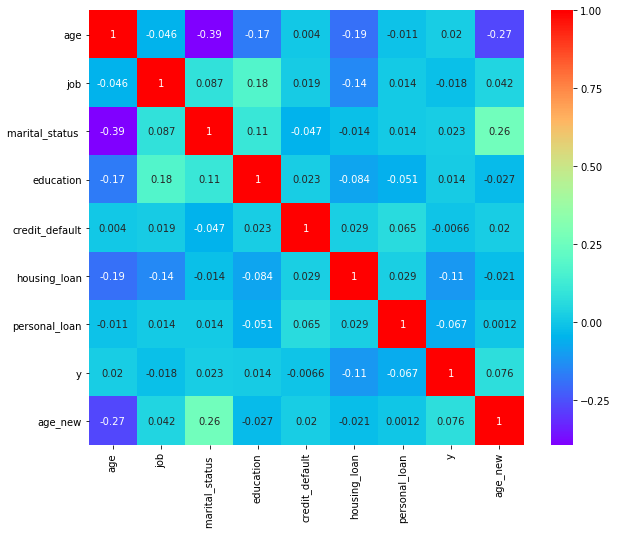

In [116]:
# corr = main_df.corr()
# sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# balanced_data.corr(method = 'pearson')
# sn.pairplot(balanced_data)
# main_df.head()

f, ax = plt.subplots(figsize=(10, 8))
corr = balanced_data.corr()
# sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sn.diverging_palette(220, 10, as_cmap=True), square=True
#            , ax=ax, annot = True)
sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='rainbow', square=True
           , ax=ax, annot = True)


# ValueError: Colormap RdGnBu is not recognized. Possible values are: Accent, Accent_r, Blues
#         , Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r
#         , Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges
#         , Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r
#         , PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r
#         , RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r
#         , Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r
#         , YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r
#         , afmhot, afmhot_r, autumn, autumn_r, binary, binary_r
#         , bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r
#         , cool, cool_r, coolwarm, coolwarm_r, copper, copper_r
#         , cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r
#         , gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r
#         , gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r
#         , gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r
#         , inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r
#         , nipy_spectral, nipy_spectral_r, ocean, ocean_r
#         , pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r
#         , rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r
#         , tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis
#         , viridis_r, vlag, vlag_r, winter, winter_r